1. Can we use Bagging for regression problems?
- Yes, Bagging can be used for regression problems. Bagging Regressor is a type of ensemble learning method that combines multiple regression models to improve the accuracy and robustness of predictions.


2. What is the difference between multiple model training and single model training?
- Multiple model training involves training multiple models on the same dataset and combining their predictions, whereas single model training involves training a single model on the dataset. Multiple model training can improve accuracy and robustness, but requires more computational resources.


3. Explain the concept of feature randomness in Random Forest.
- Feature randomness in Random Forest refers to the random selection of features at each node of the decision tree. This helps to reduce the correlation between trees and improves the overall accuracy of the model.



4. What is OOB (Out-of-Bag) error in Bagging?
-  OOB error is a measure of the error rate of a Bagging model on the training data. It's calculated using the samples that are not included in the bootstrap sample.


5. How can you measure the importance of features in a Random Forest model?
- Feature importance in Random Forest can be measured using the permutation feature importance or the Gini importance. Permutation feature importance measures the decrease in model accuracy when a feature is randomly permuted, while Gini importance measures the decrease in impurity when a feature is used to split a node.


6. Explain the working principle of a Bagging Classifier.
- A Bagging Classifier works by training multiple instances of a base classifier on different bootstrap samples of the training data. The predictions of each classifier are then combined to produce the final prediction.


7. How do you evaluate a Bagging Classifier's performance?
A Bagging Classifier's performance can be evaluated using metrics such as accuracy, precision, recall, F1 score, and AUC-ROC.



8. How does a Bagging Regressor work?
-  A Bagging Regressor works similarly to a Bagging Classifier, but instead of classifying instances, it predicts continuous values. The predictions of each regressor are combined to produce the final prediction.


9. What is the main advantage of ensemble techniques?
- The main advantage of ensemble techniques is that they can improve the accuracy and robustness of predictions by combining multiple models.


10. What is the main challenge of ensemble methods?
-  The main challenge of ensemble methods is that they can be computationally expensive and require careful tuning of hyperparameters.

11. Explain the key idea behind ensemble techniques.
-  The key idea behind ensemble techniques is to combine multiple models to improve the accuracy and robustness of predictions.


12. What is a Random Forest Classifier?
-   A Random Forest Classifier is a type of ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of classification predictions.


13. What are the main types of ensemble techniques?
-  The main types of ensemble techniques are Bagging, Boosting, and Stacking.


14. What is ensemble learning in machine learning?
-  Ensemble learning is a machine learning approach that combines multiple models to improve the accuracy and robustness of predictions.


15. When should we avoid using ensemble methods?
- We should avoid using ensemble methods when the dataset is small or when computational resources are limited.


16. How does Bagging help in reducing overfitting?
- Bagging helps in reducing overfitting by averaging the predictions of multiple models, which reduces the variance of the predictions.


17. Why is Random Forest better than a single Decision Tree?
-  Random Forest is better than a single Decision Tree because it combines multiple trees to improve the accuracy and robustness of predictions.



18. What is the role of bootstrap sampling in Bagging?
- Bootstrap sampling is used in Bagging to create different training datasets for each model. This helps to reduce overfitting and improve the accuracy of predictions.


19. What are some real-world applications of ensemble techniques?
- Ensemble techniques have many real-world applications, including image classification, speech recognition, and natural language processing.



20. What is the difference between Bagging and Boosting?
- Bagging and Boosting are both ensemble learning methods, but Bagging combines multiple models trained on different bootstrap samples, while Boosting combines multiple models trained on the residuals of the previous models.

In [1]:
import numpy as np
from sklearn.datasets import make_classification, make_regression, load_breast_cancer
from sklearn.ensemble import (
    BaggingClassifier, BaggingRegressor,
    RandomForestClassifier, RandomForestRegressor,
    VotingClassifier
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score


In [17]:
#1

# Generate a classification dataset
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# Train a Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)

# Evaluate and print accuracy
accuracy = accuracy_score(y_test, bagging_clf.predict(X_test))
print(" Bagging Classifier Accuracy:", accuracy)


 Bagging Classifier Accuracy: 0.8566666666666667


In [5]:
# 2
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_reg.fit(X_train_reg, y_train_reg)
print(" Bagging Regressor MSE:", mean_squared_error(y_test_reg, bagging_reg.predict(X_test_reg)))

 Bagging Regressor MSE: 9325.370955742552


In [6]:
# 3
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)
rf_cancer = RandomForestClassifier(random_state=42)
rf_cancer.fit(X_train_cancer, y_train_cancer)
print(" RF Classifier Feature Importances:", rf_cancer.feature_importances_)

 RF Classifier Feature Importances: [0.03231189 0.0110639  0.06009233 0.05381045 0.00622336 0.00921566
 0.08055702 0.14193444 0.00327807 0.00314028 0.01643496 0.00317191
 0.01176976 0.02953842 0.00588079 0.00459638 0.0058159  0.00338232
 0.00400077 0.00713457 0.07797475 0.01878567 0.07429212 0.11821686
 0.01176917 0.01753909 0.04107958 0.12713638 0.01292945 0.00692376]


In [8]:
# 4
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
rf_reg.fit(X_train_reg, y_train_reg)
print(" Decision Tree Regressor MSE:", mean_squared_error(y_test_reg, dt_reg.predict(X_test_reg)))
print(" Random Forest Regressor MSE:", mean_squared_error(y_test_reg, rf_reg.predict(X_test_reg)))


 Decision Tree Regressor MSE: 22880.9967040863
 Random Forest Regressor MSE: 7375.845338518913


In [9]:
# 5
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)
print(" Random Forest OOB Score:", rf_oob.oob_score_)

 Random Forest OOB Score: 0.9014285714285715


In [11]:
# 6
svm_bag = BaggingClassifier(estimator=SVC(probability=True), n_estimators=10, random_state=42)
svm_bag.fit(X_train, y_train)
print(" Bagging SVM Accuracy:", accuracy_score(y_test, svm_bag.predict(X_test)))

 Bagging SVM Accuracy: 0.8433333333333334


In [12]:
# 7
tree_counts = [1, 10, 50, 100, 200]
print(" RF Accuracy with Different Tree Counts:")
for n in tree_counts:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"   - Trees: {n}, Accuracy: {acc:.4f}")

 RF Accuracy with Different Tree Counts:
   - Trees: 1, Accuracy: 0.7767
   - Trees: 10, Accuracy: 0.8333
   - Trees: 50, Accuracy: 0.8500
   - Trees: 100, Accuracy: 0.8567
   - Trees: 200, Accuracy: 0.8600


In [14]:
# 8
log_bag = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
log_bag.fit(X_train, y_train)
log_proba = log_bag.predict_proba(X_test)[:, 1]
print("Bagging Logistic Regression AUC Score:", roc_auc_score(y_test, log_proba))

Bagging Logistic Regression AUC Score: 0.9136818687430479


In [15]:
# 9
print(" RF Regressor Feature Importances:", rf_reg.feature_importances_)


 RF Regressor Feature Importances: [0.13839326 0.23544572 0.00828621 0.00803909 0.17436177 0.00826038
 0.10828721 0.00864862 0.01000499 0.00792906 0.00928509 0.02036746
 0.00858857 0.0092679  0.00860125 0.01866979 0.01075335 0.19033601
 0.00911529 0.00735896]


In [16]:
# 10
ensemble = VotingClassifier(estimators=[
    ('bag', bagging_clf),
    ('rf', rf_cancer)
], voting='soft')
ensemble.fit(X_train, y_train)
print(" Ensemble (Bagging + RF) Accuracy:", accuracy_score(y_test, ensemble.predict(X_test)))

 Ensemble (Bagging + RF) Accuracy: 0.8666666666666667


In [19]:
#11
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)


Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [22]:
#12
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

for n in [5, 10, 50, 100]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n)
    model.fit(X_train, y_train)
    print(f"n_estimators={n}, Score: {model.score(X_test, y_test)}")


n_estimators=5, Score: 0.5151946607341489
n_estimators=10, Score: 0.5982202447163514
n_estimators=50, Score: 0.5808943270300333
n_estimators=100, Score: 0.6161001112347051


In [21]:
#13
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
misclassified = X_test[y_pred != y_test]
print("Misclassified Samples:", misclassified)


Misclassified Samples: [[ 2.89064299e+00  8.38689386e-01 -8.17095459e-01  2.52231480e-01
   9.39029157e-01 -8.12270810e-01  1.88670448e-01 -7.15337569e-01
  -3.67863294e-01 -3.35762004e-03  6.20997566e-01  2.74311287e+00
   1.48615924e+00  1.54891795e+00 -1.17953018e+00 -1.95007793e+00
   7.03795884e-01  1.48452077e+00  6.63880594e-01  5.13587588e-02]
 [-9.18447643e-02  1.00919247e-02 -9.42558006e-01 -7.36770136e-01
  -3.22028154e-01  6.12721728e-01  1.61477879e+00  5.85904201e-01
   5.48319628e-01 -8.44941439e-01  1.32543211e+00 -1.40681501e+00
   2.18534042e-01 -1.41526719e+00 -6.80130918e-01  1.00947179e+00
  -8.74353288e-02 -1.49901596e+00 -1.95830113e-01  1.66906953e+00]
 [ 7.81430630e-02  6.25999964e-02 -1.02402859e+00  1.19054859e+00
  -9.64537795e-01  4.06784516e-01 -2.79810342e-01  2.16505607e+00
   1.39060399e-01 -5.63947488e-01  5.05965553e-01 -7.28272202e-01
   1.02698626e+00  2.12574031e-01 -5.88072237e-01  1.10590042e+00
   8.61636124e-01 -8.16217245e-01 -1.03488775e-01 -

In [24]:
#14
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50).fit(X_train, y_train)
print("Decision Tree Accuracy:", dt.score(X_test, y_test))
print("Bagging Classifier Accuracy:", bag.score(X_test, y_test))


Decision Tree Accuracy: 0.85
Bagging Classifier Accuracy: 0.8633333333333333


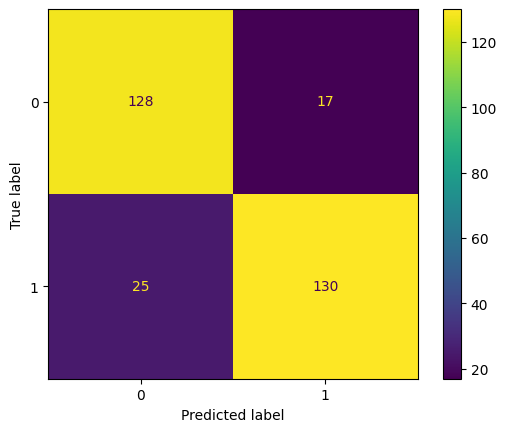

In [25]:
#15
from sklearn.metrics import ConfusionMatrixDisplay

rf = RandomForestClassifier().fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)


In [27]:
#16
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
print("Stacking Accuracy:", stack.score(X_test, y_test))


Stacking Accuracy: 0.8533333333333334


In [44]:
#17
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
feature_names = X.columns

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
top5 = np.argsort(importances)[-5:][::-1]  # Top 5 important features

# Print the top 5 features
print("Top 5 Important Features:")
print(pd.Series(importances, index=feature_names).iloc[top5])


Top 5 Important Features:
petal length (cm)    0.439994
petal width (cm)     0.421522
sepal length (cm)    0.108098
sepal width (cm)     0.030387
dtype: float64


In [29]:
#18
from sklearn.metrics import precision_score, recall_score, f1_score

bag = BaggingClassifier().fit(X_train, y_train)
y_pred = bag.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))


Precision: 0.8640366482832236
Recall: 0.8641824249165739
F1-score: 0.8633318147979422


In [30]:
#19
for depth in [5, 10, 20, None]:
    rf = RandomForestClassifier(max_depth=depth)
    rf.fit(X_train, y_train)
    print(f"max_depth={depth}, Accuracy: {rf.score(X_test, y_test)}")


max_depth=5, Accuracy: 0.8466666666666667
max_depth=10, Accuracy: 0.8666666666666667
max_depth=20, Accuracy: 0.8633333333333333
max_depth=None, Accuracy: 0.86


In [32]:
#20
from sklearn.neighbors import KNeighborsRegressor

for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    model = BaggingRegressor(estimator=base, n_estimators=10)
    model.fit(X_train, y_train)
    print(f"{base.__class__.__name__}, Score: {model.score(X_test, y_test)}")


DecisionTreeRegressor, Score: 0.580333704115684
KNeighborsRegressor, Score: 0.42894949944382643


In [33]:
#21
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier().fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


ROC-AUC Score: 0.9257842046718576


In [43]:
#22
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load a sample dataset
data = load_iris()
X, y = data.data, data.target

# Initialize Bagging Classifier with a base estimator
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Perform cross-validation
scores = cross_val_score(bag, X, y, cv=5)

# Print average accuracy
print("Cross-validation Accuracy:", scores.mean())


Cross-validation Accuracy: 0.9533333333333334


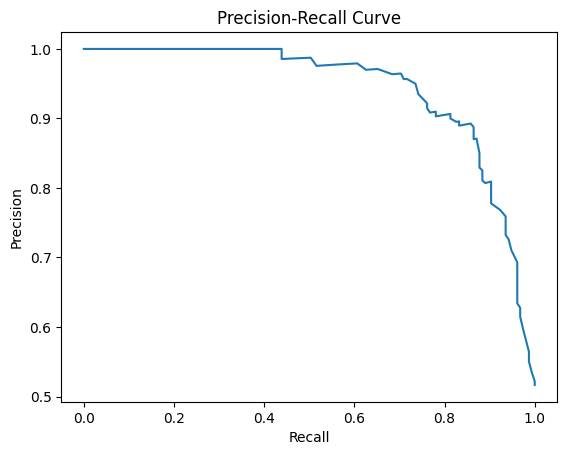

In [37]:
#23
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [38]:
#24
estimators = [
    ('rf', RandomForestClassifier()),
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
print("Stacking Accuracy:", stack.score(X_test, y_test))


Stacking Accuracy: 0.8666666666666667


In [39]:
#25
for b in [0.5, 0.7, 1.0]:
    bag = BaggingRegressor(n_estimators=50, max_samples=b)
    bag.fit(X_train, y_train)
    print(f"Bootstrap Sample={b}, Score: {bag.score(X_test, y_test)}")


Bootstrap Sample=0.5, Score: 0.5847599555061178
Bootstrap Sample=0.7, Score: 0.5762384872080089
Bootstrap Sample=1.0, Score: 0.5981454949944383
